In [146]:
import numpy as np
import pandas as pd 

In [147]:
df_train = pd.DataFrame(pd.read_excel("bike_train.xlsx"))
df_test = pd.DataFrame(pd.read_excel("bike_test.xlsx"))

In [148]:
df_train = df_train.drop(['casual' , 'registered'], axis=1)
# df_train

In [149]:
df_train['cnt'].describe()

count    11999.000000
mean       158.594966
std        151.392952
min          1.000000
25%         34.000000
50%        118.000000
75%        232.000000
max        957.000000
Name: cnt, dtype: float64

In [150]:
df_train.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,1.000000,0.118039,0.777284,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.229814
season,0.118039,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.111369
yr,0.777284,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.156960
mnth,0.167195,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.073431
hr,-0.007446,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.396698
holiday,0.008323,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,-0.030304
weekday,0.007103,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.022618
workingday,0.005295,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,0.025132
weathersit,-0.015359,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.149848
temp,0.029297,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.395743


Text(0.5, 0.98, 'total  rentados Cant')

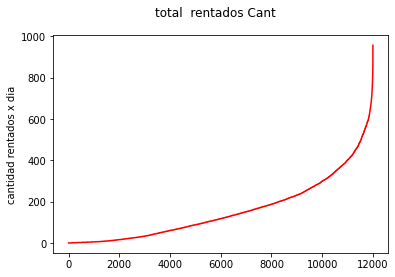

In [151]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1)
ax.plot(sorted(df_train['cnt']) ,color='red', label='cnt')
ax.set_ylabel('cantidad rentados x dia')
fig.suptitle('total  rentados Cant')

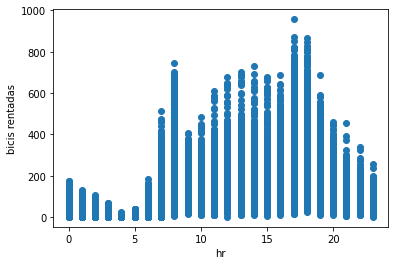

In [152]:
variable = 'hr'
plt.scatter(df_train[variable], df_train['cnt'])
plt.xlabel(variable)
plt.ylabel('bicis rentadas')
plt.show()

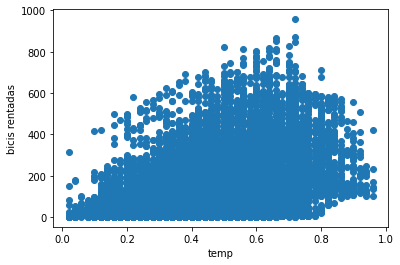

In [153]:
variable = 'temp'
plt.scatter(df_train[variable], df_train['cnt'])
plt.xlabel(variable)
plt.ylabel('bicis rentadas')
plt.show()

<AxesSubplot:>

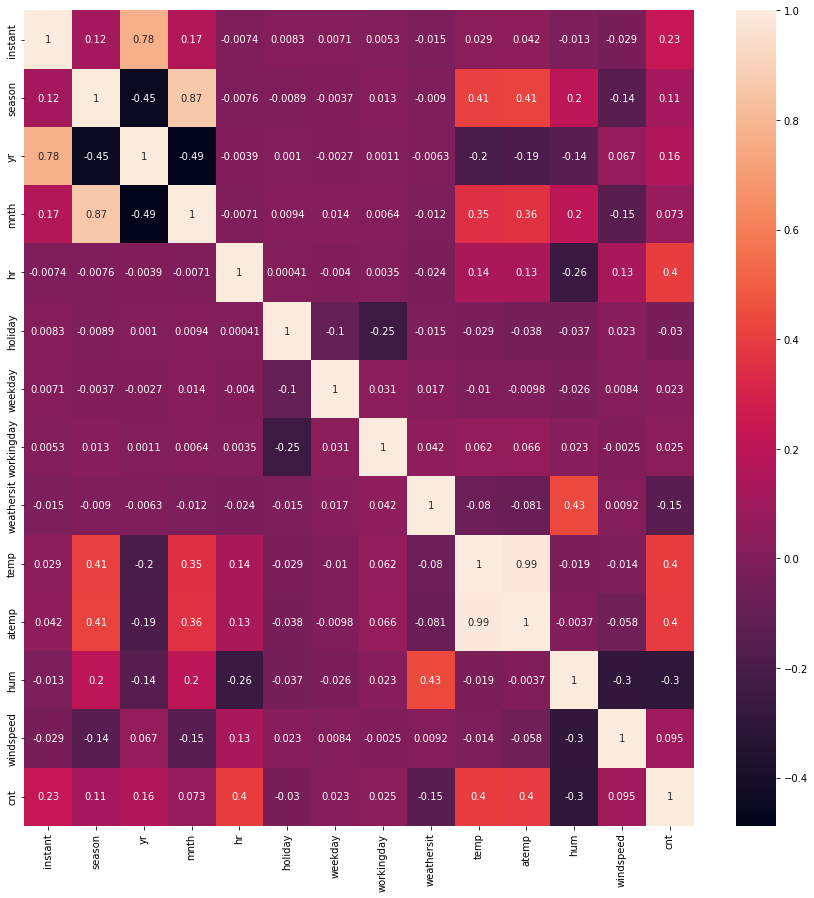

In [154]:
import seaborn as sns
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df_train.corr(),annot=True)

Basicamente lo que hice en las anteriores lineas de codigo fue analizar los datos para ver con cuales trabajare

In [155]:
df_modelo2 = df_train[['hr','temp','workingday']]#'casual','registered']]
#agarro las columnas que mas correlacion tiene con la columna cnt

In [163]:
X = df_modelo2
y = df_train['cnt']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [164]:
y = y.values.reshape(-1, 1)

y_scaled = scaler.fit_transform(y)

In [165]:
# from sklearn.model_selection import train_test_split
import tensorflow as tf

# X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size =0.25, random_state = 0 )

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100 ,activation='relu',input_shape=(3, )))
model.add(tf.keras.layers.Dense(units=100 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=100 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=1 ,activation='linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               400       
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,701
Trainable params: 20,701
Non-trainable params: 0
_________________________________________________________________


In [166]:
from sklearn.metrics import mean_squared_error
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer = "Adam", loss = 'mean_squared_error', metrics = metrics)

epoch_historial = model.fit(X_scaled,y_scaled,epochs = 200,batch_size =50, validation_split=0.2)

#se entrena al modelo, el epochs es basicamente cuantas veces se entrenara el modelo

Epoch 1/200
192/192 [==============================] - 1s 3ms/step - loss: 0.0112 - root_mean_squared_error: 0.1056 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1749
Epoch 2/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0081 - root_mean_squared_error: 0.0903 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1519
Epoch 3/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 4/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0048 - root_mean_squared_error: 0.0693 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1279
Epoch 5/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1201
Epoch 6/200
192/192 [==============================] - 0s 2ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 0.0183 

In [167]:
epoch_historial.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

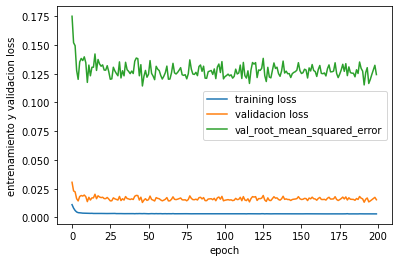

In [168]:
plt.plot(epoch_historial.history['loss'])
plt.plot(epoch_historial.history['val_loss'])
plt.plot(epoch_historial.history['val_root_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('entrenamiento y validacion loss')
plt.legend(['training loss','validacion loss','val_root_mean_squared_error'])


In [ ]:
df1 = df_test[['hr','temp','workingday']]

In [169]:
scaler_1 = MinMaxScaler()
X_testeo = df1
X_testeo_scaled = scaler_1.fit_transform(X_testeo)

In [173]:
y_predict_1 = model.predict(X_scaled)
y_test_pred = y_predict_1
y_predict_1 = scaler.inverse_transform(y_predict_1)

#predigo con los datos de test (y las dichas columnas que seleccione antes segun su correlacion)
#y le hago un inverse transform asi tengo los datos en el formato que estaban

375/375 [==============================] - 0s 1ms/step


In [175]:
RMSE = np.sqrt(mean_squared_error(y_scaled, y_test_pred))

RMSE

0.07441146751088461

In [ ]:
dataframe = pd.DataFrame(y_predict_1)
dataframe2 = dataframe.rename(columns={0:'pred'})
dataframe2['pred']=dataframe2['pred'].astype('int64')
# dataframe2.to_csv('luqui5.csv',index=False)
#paso a dataframe y guardo a csv los datos para la entregaa